In [70]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

C:\Users\bo.pei\softwares\Anaconda\Installation\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bo.pei\softwares\Anaconda\Installation\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [79]:
# create a dataset
x=np.linspace(-5,5,20)
x0=x*np.random.rand(len(x))+10
x1=x*np.random.rand(len(x))-10
x2=x*np.random.rand(len(x))

x_tot=np.stack((x0,x1,x2)).flatten()

In [80]:
gauss_1=norm(loc=-5,scale=5)
gauss_2=norm(loc=8,scale=3)
gauss_3=norm(loc=1.5,scale=1)

In [81]:
# create an array to store the probability of each x belongs to each cluster
r=np.zeros((len(x_tot),3))

In [82]:
for c,g in zip(range(3),[gauss_1,gauss_2,gauss_3]):
    r[:,c]=(1/3)*g.pdf(x_tot)
# normalize r
for i in range(len(x_tot)):
    r[i,:]=r[i,:]/np.sum(r,axis=1)[i]

(-0.1, 0.4)

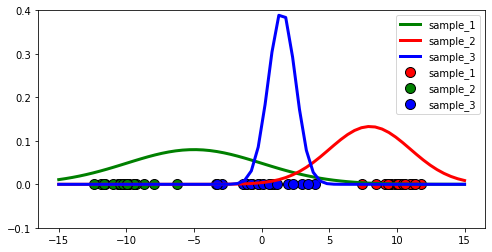

In [118]:
plt.figure(figsize=(8,4))

plt.scatter(x0,np.tile(0,len(x0)),edgecolor='k',facecolor='r',s=100,label='sample_1')
plt.scatter(x1,np.tile(0,len(x1)),edgecolor='k',facecolor='g',s=100,label='sample_2')
plt.scatter(x2,np.tile(0,len(x2)),edgecolor='k',facecolor='b',s=100,label='sample_3')

plt.plot(np.linspace(-15,15,60),gauss_1.pdf(np.linspace(-15,15,60)),'g',linewidth=3,label='sample_1')
plt.plot(np.linspace(-15,15,60),gauss_2.pdf(np.linspace(-15,15,60)),'r',linewidth=3,label='sample_2')
plt.plot(np.linspace(-15,15,60),gauss_3.pdf(np.linspace(-15,15,60)),'b',linewidth=3,label='sample_3')
plt.legend(loc='best')
plt.ylim([-0.1,0.4])

In [119]:
# 一次完整更新
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from scipy.stats import norm
np.random.seed(0)

In [120]:
X=np.linspace(-5,5,20)
X0=X*np.random.rand(len(X))+10
X1=X*np.random.rand(len(X))-10
X2=X*np.random.rand(len(x))
X_tot=np.stack((X0,X1,X2)).flatten()

In [130]:
# the probabilities of each clusters
m=np.array([1/3,1/3,1/3])
pi=m/np.sum(m) #indicate the probability of each cluster

In [128]:
# create a matrix that saves the probabilities of each sample belongs to each cluster
r=np.zeros((len(X_tot),3))

In [129]:
# Initiate the gaussian models
gauss_1=norm(loc=-5,scale=5)
gauss_2=norm(loc=8,scale=3)
gauss_3=norm(loc=1.5,scale=1)

In [133]:
# calculate the probability of each x belongs to each cluster
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c]=p*g.pdf(X_tot)

In [143]:
# Normalize r
for i in range(len(r)):
    r[i]=r[i]/np.sum(r,axis=1)[i]

In [151]:
# M-Step
m_c=np.sum(r,axis=0) # calculate the marginalized probability of each cluster (or generally the number of datapoints in each cluster)
pi_c=[m/np.sum(m_c) for m in m_c] # calculate the proportion of the datapoints belongs to each cluster

In [159]:
# Calculate the parameters for the distribution
mu_c=np.sum(X_tot.reshape(len(X_tot),1)*r,axis=0)/m_c

In [170]:
var_c=[]
for c in range(len(r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1)-mu_c[c])).T,(X_tot.reshape(len(X_tot),1)-mu_c[c])))

In [186]:
# Update the gaussians
gauss_1=norm(loc=mu_c[0],scale=var_c[0])
gauss_2=norm(loc=mu_c[1],scale=var_c[1])
gauss_3=norm(loc=mu_c[2],scale=var_c[2])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


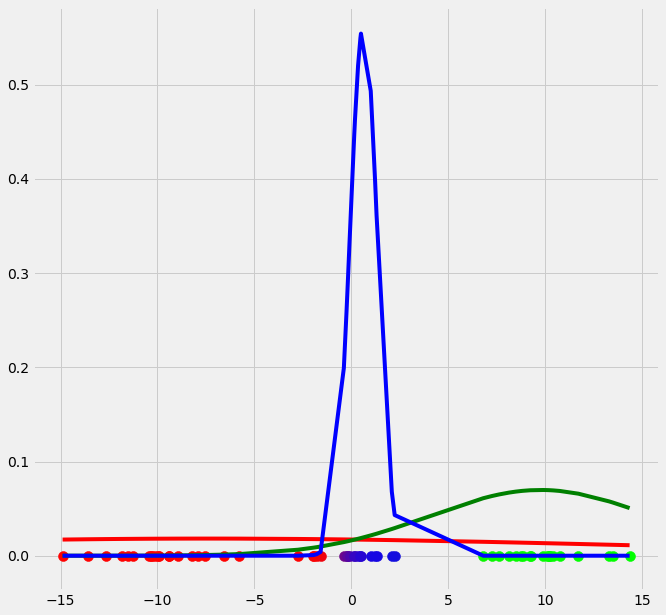

In [194]:
# plot the data
fig=plt.figure(figsize=(10,10))
ax0=fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
    
for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


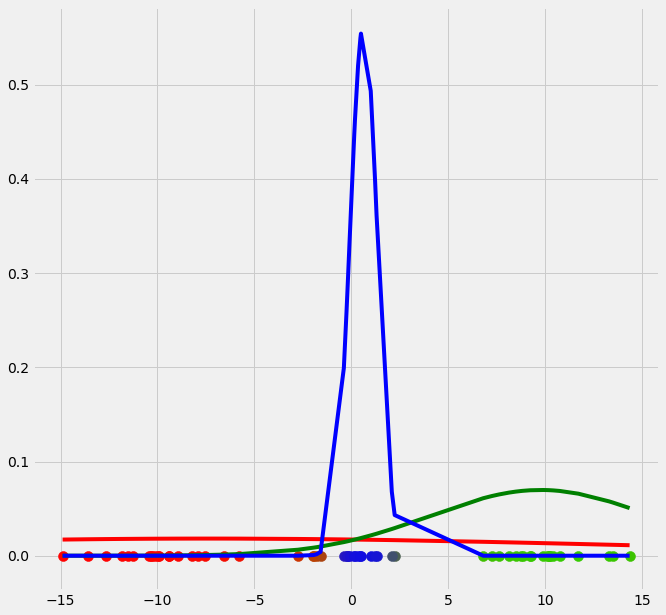

In [205]:
# update r--based on the gaussian, pi_c
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi_c):
    r[:,c]=p*g.pdf(X_tot)


# Normalize the r
for i in range(len(r)):
    r[i]=r[i]/np.sum(r,axis=1)[i]
    
# plot the data
fig=plt.figure(figsize=(10,10))
ax0=fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)

for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(len(X_tot),1)),\
                gauss_2.pdf(np.sort(X_tot).reshape(len(X_tot),1)),\
                gauss_3.pdf(np.sort(X_tot).reshape(len(X_tot),1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)


# Wrap up

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from scipy.stats import norm
np.random.seed(0)

In [207]:
X=np.linspace(-5,5,20)
X0=X*np.random.rand(len(X))+10
X1=X*np.random.rand(len(X))-10
X2=X*np.random.rand(len(X))

X_tot=np.stack((X0,X1,X2)).flatten()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

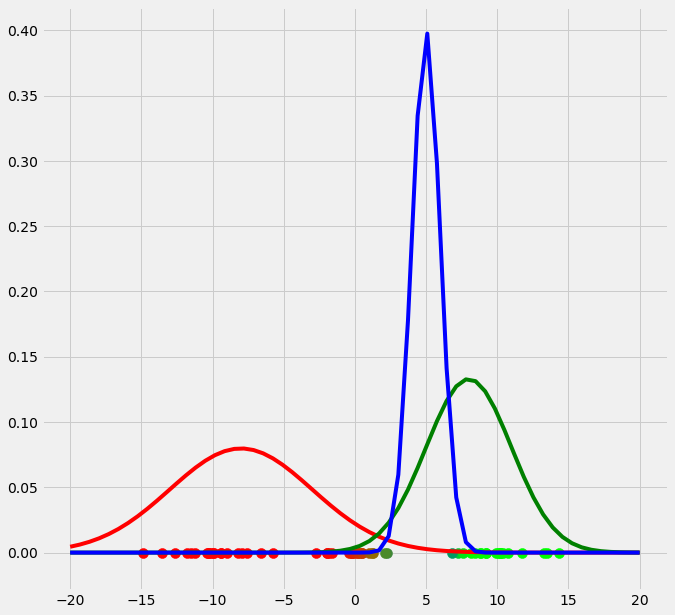

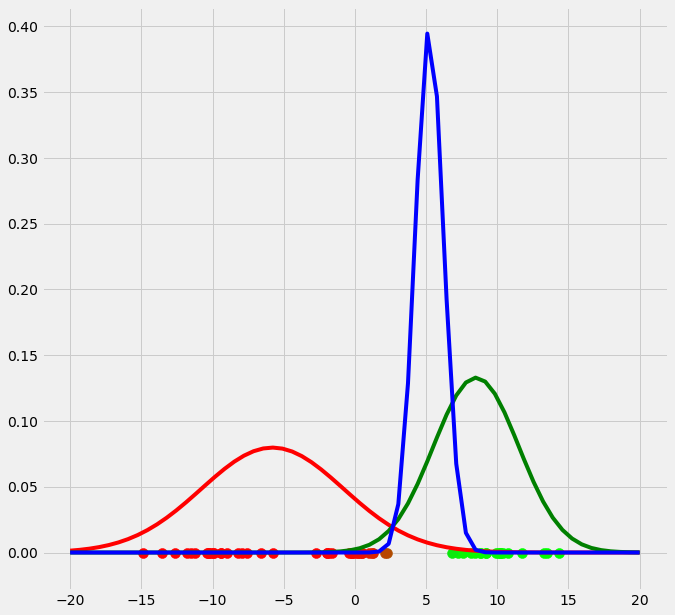

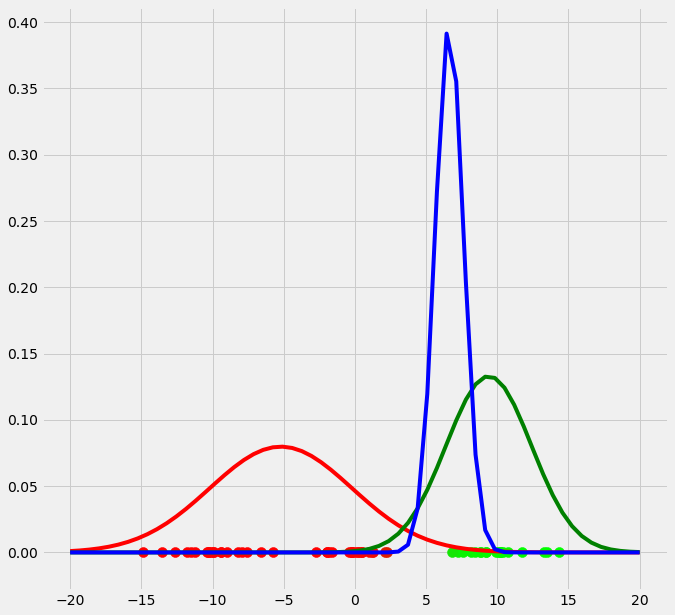

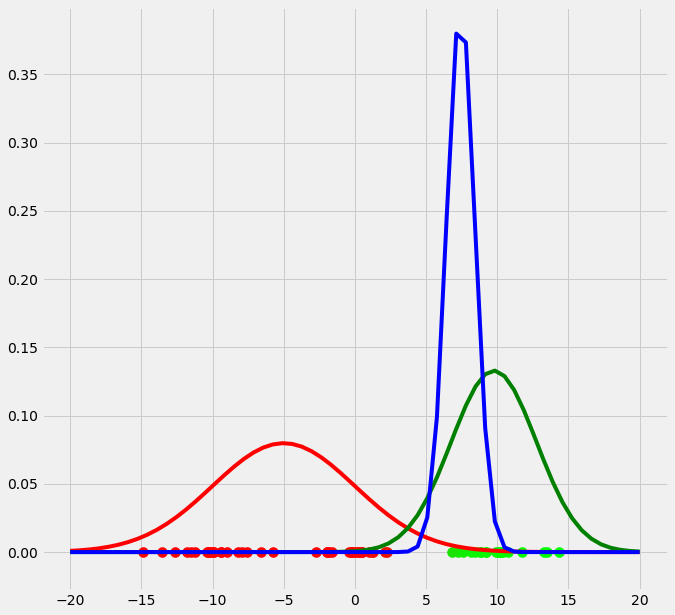

In [213]:
class GM1D:
    def __init__(self,X,iterations):
        self.X=X
        self.iterations=iterations
        self.mu=None
        self.pi=None
        self.var=None
        
    def run(self):
        self.mu=[-8,8,5]
        self.pi=[1/3,1/3,1/3]
        self.var=[5,3,1]
        
        '''
        E-Step
        '''
        for iter in range(self.iterations):
            r=np.zeros((len(self.X),3))
            
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),\
                                       norm(loc=self.mu[1],scale=self.var[1]),\
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c]=p*g.pdf(X_tot)
            
            # Normalize the r
            for i in range(len(r)):
                r[i]=r[i]/np.sum(r,axis=1)[i]
                
            
            # plot the data
            fig=plt.figure(figsize=(10,10))
            ax0=fig.add_subplot(111)
            
            for i in range(len(r)):
                ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
                
            # plot the distribution
            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,60)),\
                            norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,60)),\
                            norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,60))],\
                           ['r','g','b']):
                ax0.plot(np.linspace(-20,20,60),g,c=c)
            
            '''
            M-Step
            '''
            m_c=[]
            for c in range(len(r[0])):
                m=np.sum(r[:,c])
                m_c.append(m)
            
            # Calculate pi_c
            for k in range(len(m_c)):
                self.pi[k]=m_c[k]/np.sum(m_c)
            
            # Calculate the mu_c
            self.mu=np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            
            # Calculate the var_c
            var_c=[]
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot((np.array(r[:,c]).reshape(len(self.X),1)*self.X.reshape(len(self.X),1)-self.mu[c]).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            
                
gm1d=GM1D(X_tot,4)
gm1d.run()
                
            

# GMM in Python from scratch

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import multivariate_normal
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)

In [295]:
# Create dataset
X,Y=make_blobs(cluster_std=1.5,
               random_state=20,
               n_samples=500,
               centers=3)
X=np.dot(X,np.random.RandomState(0).randn(2,2))

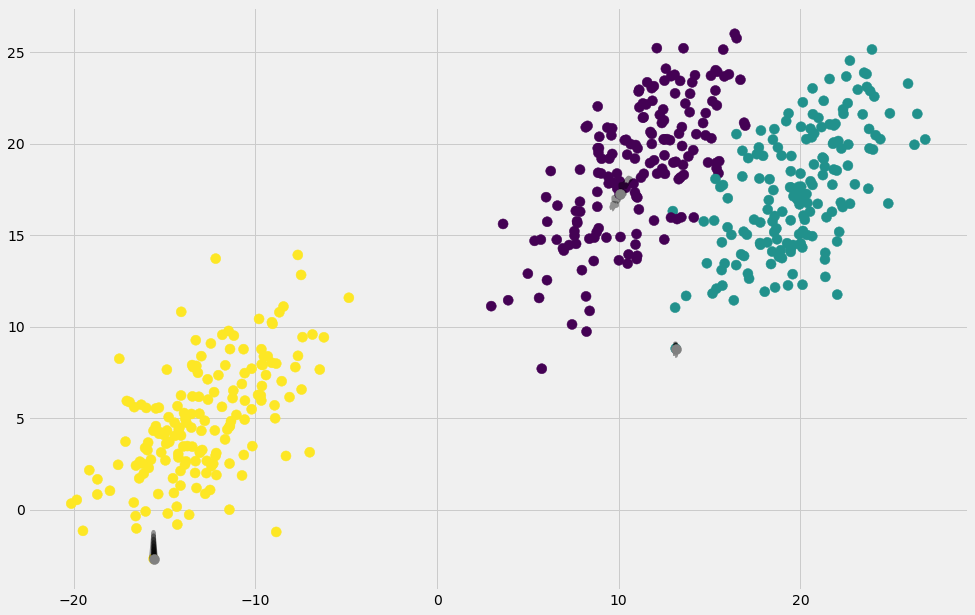

In [341]:
class GMM:
    def __init__(self,X,number_of_sources,iterations):
        self.X=X
        self.number_of_sources=number_of_sources
        self.iterations=iterations
        self.mu=None
        self.cov=None
        self.pi=None
        self.XY=None
#         self.log_likelihood=[]
        
    def run(self):
        self.reg_cov=1e-6*np.identity(len(self.X[0]))
        x,y=np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY=np.array([x.flatten(),y.flatten()]).T
        
        self.mu=np.random.randint(min(self.X[:,0]),
                                  max(self.X[:,0]),
                                  size=(self.number_of_sources,len(self.X[0])))
        
        self.cov=np.zeros((self.number_of_sources,len(X[0]),len(X[0])))
        
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)
            
        self.pi=np.ones(self.number_of_sources)/self.number_of_sources
        
        self.log_likelihood=[]
        
        for i in range(self.iterations):
            '''E-Step'''
            r_ic=np.zeros((len(self.X),self.number_of_sources))
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(self.number_of_sources)):
                co+=self.reg_cov
                mn=multivariate_normal(mean=m,cov=co)
                # 对于每个数据，计算其属于某一类的归一化概率，分母是每个数据属于这个三个不同类别的和，分子为该数据属于每一个类的概率
                r_ic[:,r]=p*mn.pdf(self.X)/np.sum([pi*multivariate_normal(mean=mu,cov=c).pdf(self.X) for pi,mu,c in zip(self.pi,self.mu,self.cov+self.reg_cov)])
                
        
            self.mu=[]
            self.cov=[]
            self.pi=[]

            for c in range(self.number_of_sources):
                m_c=np.sum(r_ic[:,c],axis=0)
                mu_c=(1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)

                self.pi.append(m_c/np.sum(r_ic))

            self.log_likelihood.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(self.X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            
            
    
    def plotfig(self):
        fig=plt.figure(figsize=(15,10))
        ax0=fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1],c=Y,s=100)
#         ax0.scatter(self.mu[:,0],self.mu[:,1],c='gray',s=100)
        
        for m,c in zip(self.mu,self.cov):
            c+=self.reg_cov
            multi_normal=multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),
                        np.sort(self.X[:,1]),
                        multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),
                        colors='black',
                        alpha=0.4)
            ax0.scatter(m[0],m[1],c='gray',zorder=10,s=100)
        
gmm=GMM(X,3,50)
gmm.run()
gmm.plotfig()

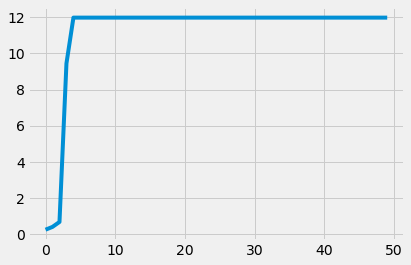

In [343]:
plt.plot(range(len(gmm.log_likelihood)),gmm.log_likelihood)